In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv


# Task1 - Loading data

In [2]:
# Reading data with using pandas library
df=pd.read_csv('turboaz.csv')

In [3]:
# Display of data
df

,Sheher,Marka,Model,Buraxilish ili,Ban novu,Reng,Muherrikin hecmi,Muherrikin gucu,Yanacaq novu,Yurush,Suretler qutusu,Oturucu,Yeni,Qiymet,Extra Info,Seller comment
0,Sumqayıt,Mercedes,C 200,1999,Sedan,Qara,2.0 L,175 a.g.,Benzin,366 000 km,Avtomat,Arxa,Xeyr,12500 AZN,Kreditdədir,Barter mümkündür
1,Bakı,Mercedes,C 180,2014,Sedan,Qara,1.6 L,167 a.g.,Benzin,102 000 km,Avtomat,Arxa,Xeyr,31500 $,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."
2,Sumqayıt,Mercedes,C 240,2002,Sedan,Qara,2.6 L,177 a.g.,Benzin,469 700 km,Avtomat,Arxa,Xeyr,11700 AZN,Kreditdədir,Barter mümkündür
3,Şirvan,Mercedes,C 180,1998,Sedan,Göy,1.8 L,125 a.g.,Benzin,556 680 km,Avtomat,Arxa,Xeyr,9700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Kon...",Mawin BAKIDADI. Tecili satilir yaxwi veziyetde...
4,Sumqayıt,Mercedes,C 220,2000,Sedan,Gümüşü,2.2 L,150 a.g.,Dizel,300 000 km,Avtomat,Arxa,Xeyr,12700 AZN,"Yüngül lehimli disklər,ABS,Mərkəzi qapanma,Par...",Vurugu udari deyisen detali curuyu qetiyyen yo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Bakı,Mercedes,C 180,1996,Sedan,Boz,1.8 L,122 a.g.,Benzin,325 000 km,Avtomat,Arxa,Xeyr,8800 AZN,"Yüngül lehimli disklər,Lyuk",Mawin ozumundu 10ildi mendedi udar gormeyib vu...
1324,Sumqayıt,Mercedes,C 180,1994,Sedan,Bənövşəyi,1.8 L,122 a.g.,Benzin,280 000 km,Avtomat,Arxa,Xeyr,6300 AZN,"Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,...",Normal maşindi ...otur sūr..problemi yoxdu..öz...
1325,Bakı,Mercedes,C 230,1998,Sedan,Ağ,2.3 L,150 a.g.,Benzin,272 000 km,Avtomat,Arxa,Xeyr,10900 AZN,"Yüngül lehimli disklər,ABS,Lyuk,Mərkəzi qapanm...",MASHIN TECILI SATILIR!! Mashin tam saz veziyet...
1326,Qusar,Mercedes,C 240,2000,Sedan,Gümüşü,2.4 L,170 a.g.,Benzin,207 000 km,Avtomat,Arxa,Xeyr,11300 AZN,Barter mümkündür,"Yüngül lehimli disklər,ABS,Yağış sensoru,Mərkə..."


In [4]:
# Getting information about data. We see that there are some columns which should be changed to numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sheher            1328 non-null   object
 1   Marka             1328 non-null   object
 2   Model             1328 non-null   object
 3   Buraxilish ili    1328 non-null   int64 
 4   Ban novu          1328 non-null   object
 5   Reng              1328 non-null   object
 6   Muherrikin hecmi  1328 non-null   object
 7   Muherrikin gucu   1328 non-null   object
 8   Yanacaq novu      1328 non-null   object
 9   Yurush            1328 non-null   object
 10  Suretler qutusu   1328 non-null   object
 11  Oturucu           1328 non-null   object
 12  Yeni              1328 non-null   object
 13  Qiymet            1328 non-null   object
 14  Extra Info        1322 non-null   object
 15  Seller comment    1327 non-null   object
dtypes: int64(1), object(15)
memory usage: 166.1+ KB


In [5]:
# Keeping necessary columns.
df=df[["Buraxilish ili","Yurush","Qiymet"]]


In [6]:
df

,Buraxilish ili,Yurush,Qiymet
0,1999,366 000 km,12500 AZN
1,2014,102 000 km,31500 $
2,2002,469 700 km,11700 AZN
3,1998,556 680 km,9700 AZN
4,2000,300 000 km,12700 AZN
...,...,...,...
1323,1996,325 000 km,8800 AZN
1324,1994,280 000 km,6300 AZN
1325,1998,272 000 km,10900 AZN
1326,2000,207 000 km,11300 AZN


In [7]:
# Data cleaning process to prepare it for model training.
df['Yurush'] = df['Yurush'].str.replace('km', '')
df['Yurush'] = df['Yurush'].str.replace(' ', '')


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\1758087238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yurush'] = df['Yurush'].str.replace('km', '')
C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\1758087238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yurush'] = df['Yurush'].str.replace(' ', '')


In [8]:
# Changing dtype of "Yurush" column.
df["Yurush"]=df["Yurush"].astype(int)

C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\365720574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Yurush"]=df["Yurush"].astype(int)


In [9]:
# looking at unique values in "Qiymet" column to identify pattern to bring values common currency.
df["Qiymet"].unique()

array(['12500 AZN', '31500 $', '11700 AZN', '9700 AZN', '12700 AZN',
       '11200 AZN', '13800 AZN', '11400 AZN', '8500 AZN', '6800 AZN',
       '11300 AZN', '9300 AZN', '12800 AZN', '7300 AZN', '12400 AZN',
       '7350 AZN', '10500 AZN', '12300 AZN', '10900 AZN', '14000 AZN',
       '10700 AZN', '7500 AZN', '8300 AZN', '8600 AZN', '12650 AZN',
       '11800 AZN', '12000 AZN', '11900 AZN', '32700 $', '50999 $',
       '9500 AZN', '11000 AZN', '9000 AZN', '10400 AZN', '11600 AZN',
       '10850 AZN', '36500 $', '10800 AZN', '10750 AZN', '9900 AZN',
       '10000 AZN', '6900 AZN', '18500 AZN', '8700 AZN', '11500 AZN',
       '8200 AZN', '7800 AZN', '8900 AZN', '10300 AZN', '8400 AZN',
       '7900 AZN', '10600 AZN', '56500 $', '15400 AZN', '12900 AZN',
       '37000 $', '18400 $', '9100 AZN', '9800 AZN', '55000 $',
       '10200 AZN', '10950 AZN', '16800 AZN', '14300 AZN', '13000 AZN',
       '20800 $', '12200 AZN', '15000 AZN', '8000 AZN', '15300 AZN',
       '15800 $', '4500 AZN', '1

In [10]:
# Function for converting prices which are in dollar to manat.
def convert_price(price):
    if '$' in price:
        return float(price.replace('$', '').strip()) * 1.7
    elif 'AZN' in price:
        return float(price.replace('AZN', '').strip())
    return price

df['Qiymet_yeni'] = df['Qiymet'].apply(convert_price)

df['Qiymet_yeni'] = pd.to_numeric(df['Qiymet_yeni'])


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\2408388326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Qiymet_yeni'] = df['Qiymet'].apply(convert_price)
C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\2408388326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Qiymet_yeni'] = pd.to_numeric(df['Qiymet_yeni'])


In [11]:
df.drop(['Qiymet'],axis=1,inplace=True)


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\2062526467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Qiymet'],axis=1,inplace=True)


In [12]:
df["Qiymet"]=df["Qiymet_yeni"]
df.drop(['Qiymet_yeni'],axis=1,inplace=True)


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\2665782329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Qiymet"]=df["Qiymet_yeni"]
C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\2665782329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Qiymet_yeni'],axis=1,inplace=True)


In [13]:
# Display of new clean data
df

,Buraxilish ili,Yurush,Qiymet
0,1999,366000,12500.0
1,2014,102000,53550.0
2,2002,469700,11700.0
3,1998,556680,9700.0
4,2000,300000,12700.0
...,...,...,...
1323,1996,325000,8800.0
1324,1994,280000,6300.0
1325,1998,272000,10900.0
1326,2000,207000,11300.0


In [14]:
# Assigning our feature and target values
X1=df["Yurush"]
X2=df["Buraxilish ili"]
Y=df["Qiymet"]

# Task2 - Visualization 

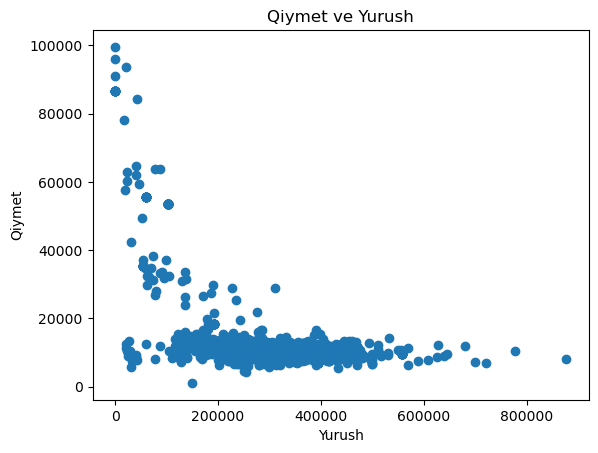

In [15]:
# Task2 - a

plt.scatter(X1, Y)  # Scatter plot of X1 (Yurush) against Y (Qiymet)

# Label the x-axis as 'Yurush'
plt.xlabel('Yurush')

# Label the y-axis as 'Qiymet'
plt.ylabel('Qiymet')

# Set the title of the plot
plt.title('Qiymet ve Yurush')

# Display the plot
plt.show()

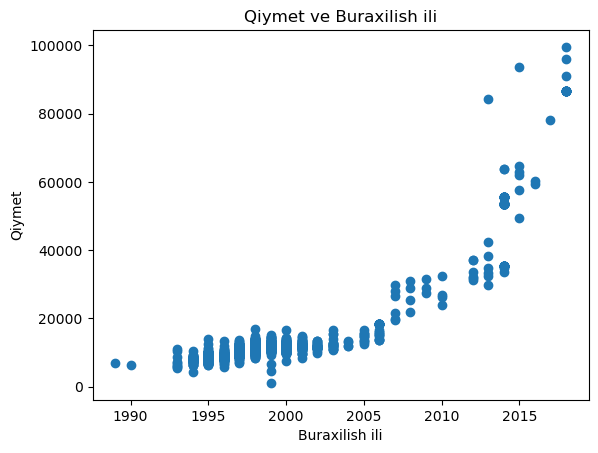

In [16]:
# Task2 - b

# Create a scatter plot to visualize the relationship between 'Buraxilish ili' and 'Qiymet'
plt.scatter(X2, Y)  # Scatter plot of X2 (Buraxilish ili) against Y (Qiymet)

# Label the x-axis as 'Buraxilish ili'
plt.xlabel('Buraxilish ili')

# Label the y-axis as 'Qiymet'
plt.ylabel('Qiymet')

# Set the title of the plot
plt.title('Qiymet ve Buraxilish ili')

# Display the plot
plt.show()


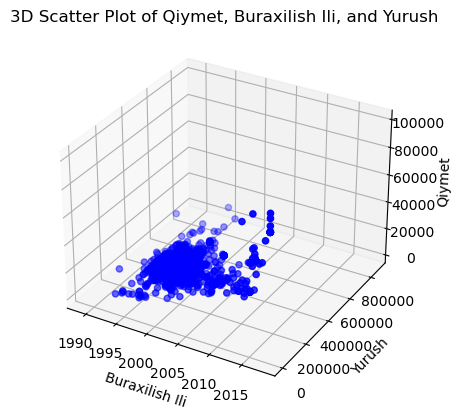

In [17]:
# Task2 - c
# Create a new figure for the 3D plot
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot using 'Buraxilish ili', 'Yurush', and 'Qiymet'
ax.scatter(X2, X1, Y, c='b', marker='o')  # Plot points with blue color ('b') and circular markers ('o')

# Label the x-axis as 'Buraxilish Ili'
ax.set_xlabel('Buraxilish Ili')

# Label the y-axis as 'Yurush'
ax.set_ylabel('Yurush')

# Label the z-axis as 'Qiymet'
ax.set_zlabel('Qiymet')

# Set the title of the 3D plot
ax.set_title('3D Scatter Plot of Qiymet, Buraxilish Ili, and Yurush')

# Display the plot
plt.show()


# Task3 - Implementation of Linear Regression from scratch

In [18]:
# Task 3 -a : Calculating cost function. Implementing a function which returns cost given true y values, x values and coefficients (𝜃).

# Prepare the feature matrix X and target vector Y
X = np.column_stack((np.ones(len(df)), X2, X1))  # Combine a column of ones (for the intercept) with X2 and X1; Shape (n_samples, n_features + 1)
Y = Y.values.reshape(-1, 1)  # Reshape Y to ensure it's a 2D column vector

# Initialize weight vector W with zeros; Shape (3, 1) for 3 features (intercept + 2)
W = np.zeros((3, 1))

# Define the cost function
def CostFunc(X, Y, W):
    n = len(Y)  # Number of training examples
    J = 0       # Initialize cost

    # Calculate the hypothesis: h(X) = X * W (predictions)
    predictions = np.dot(X, W)

    # Compute the cost using the formula: Mean Squared Error
    J = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)

    return J

# Calculate the cost before normalization
CostFunc(X, Y, W)


    

207350411.8323343

In [19]:
# Task 3 - b : Normalizing data using Z score normalization.
# Calculate the mean of the feature 'Yurush'
mean_yurush = X1.mean()

# Calculate the mean of the feature 'Buraxilish ili'
mean_buraxilish_ili = X2.mean()

# Calculate the mean of the target variable 'Qiymet'
mean_qiymet = Y.mean()

# Calculate the standard deviation of the feature 'Yurush'
std_yurush = X1.std()

# Calculate the standard deviation of the feature 'Buraxilish ili'
std_buraxilish_ili = X2.std()

# Calculate the standard deviation of the target variable 'Qiymet'
std_qiymet = Y.std()

# Print the calculated mean values with labels for each variable
print(f"Mean of Yurush: {mean_yurush}, Mean of Buraxilish Ili: {mean_buraxilish_ili}, Mean of Qiymet: {mean_qiymet}")

# Print the calculated standard deviation values with labels for each variable
print(f"Std of Yurush: {std_yurush}, Std of Buraxilish Ili: {std_buraxilish_ili}, Std of Qiymet: {std_qiymet}")



Mean of Yurush: 279649.921686747, Mean of Buraxilish Ili: 1999.8659638554218, Mean of Qiymet: 15116.45451807229
Std of Yurush: 120619.60801022759, Std of Buraxilish Ili: 5.329542690967895, Std of Qiymet: 13645.27854122885


In [20]:
# Normalize the 'Yurush' feature using mean and standard deviation
normalization_yurush = (X1 - mean_yurush) / std_yurush

# Normalize the 'Buraxilish ili' feature using mean and standard deviation
normalization_buraxilish_ili = (X2 - mean_buraxilish_ili) / std_buraxilish_ili

# Normalize the target variable 'Qiymet' using mean and standard deviation
normalization_qiymet = (Y - mean_qiymet) / std_qiymet

# Print the normalized versions of the features and target variable
print("Normalized versions: ", normalization_yurush, normalization_buraxilish_ili, normalization_qiymet)


Normalized versions:  0       0.715888
1      -1.472811
2       1.575615
3       2.296725
4       0.168713
          ...   
1323    0.375976
1324    0.002902
1325   -0.063422
1326   -0.602306
1327   -0.198557
Name: Yurush, Length: 1328, dtype: float64 0      -0.162484
1       2.652017
2       0.400416
3      -0.350117
4       0.025150
          ...   
1323   -0.725384
1324   -1.100651
1325   -0.350117
1326    0.025150
1327   -0.725384
Name: Buraxilish ili, Length: 1328, dtype: float64 [[-0.19174797]
 [ 2.81661861]
 [-0.25037631]
 ...
 [-0.30900465]
 [-0.27969048]
 [-0.33831882]]


In [21]:
# Prepare the feature matrix X with normalized features and an intercept term
X = np.column_stack((np.ones(len(df)), normalization_buraxilish_ili, normalization_yurush))  
# Combine a column of ones (for the intercept) with the normalized 'Buraxilish ili' and 'Yurush'; Shape (n_samples, n_features + 1)

# Reshape the normalized target variable 'Qiymet' to ensure it is a 2D column vector
Y = normalization_qiymet.reshape(-1, 1)

# Calculate the cost after normalization using the CostFunc
CostFunc(X, Y, W)


0.5

In [22]:
# Task 3 - c: Implement gradient descent algorithm to minimize the cost function.

# Define the gradient descent function
def gradientDescent(X, Y, W, learning_rate=0.001, num_of_iterations=10000):
    n = len(Y)  # Number of training examples
    cost_history = []  # Initialize a list to store the cost at each iteration

    # Perform gradient descent for a specified number of iterations
    for i in range(num_of_iterations):
        # Calculate predictions using the current weights
        predictions = np.dot(X, W)

        # Calculate the error between predictions and actual values
        error = predictions - Y
        
        # Calculate the gradient (partial derivatives) of the cost function
        gradient = (1/n) * np.dot(X.T, error)  # Average gradient

        # Update weights by moving in the direction of the negative gradient
        W = W - learning_rate * gradient
        
        # Calculate the cost using the updated weights and append it to the history
        cost = CostFunc(X, Y, W)
        cost_history.append(cost)

        # Print the cost every 1000 iterations to monitor progress
        if i % 1000 == 0:  # Print every 1000 iterations
            print(f"Iteration {i}, Cost: {cost}")

    return W, cost_history  # Return the final weights and the cost history


# Execute gradient descent and obtain final weights and cost history
weights, cost_history = gradientDescent(X, Y, W, learning_rate=0.001, num_of_iterations=10000)


Iteration 0, Cost: 0.4988980469876565
Iteration 1000, Cost: 0.14540550572451091
Iteration 2000, Cost: 0.11732879124786828
Iteration 3000, Cost: 0.11069208348807057
Iteration 4000, Cost: 0.10810677549455744
Iteration 5000, Cost: 0.10702088246472578
Iteration 6000, Cost: 0.10656107455146983
Iteration 7000, Cost: 0.10636621293585438
Iteration 8000, Cost: 0.10628362569740615
Iteration 9000, Cost: 0.10624862285260701


In [23]:
# Print the final weights obtained after gradient descent
print("Weights: ", weights)

Weights:  [[ 1.67636937e-14]
 [ 8.26135369e-01]
 [-9.84238722e-02]]


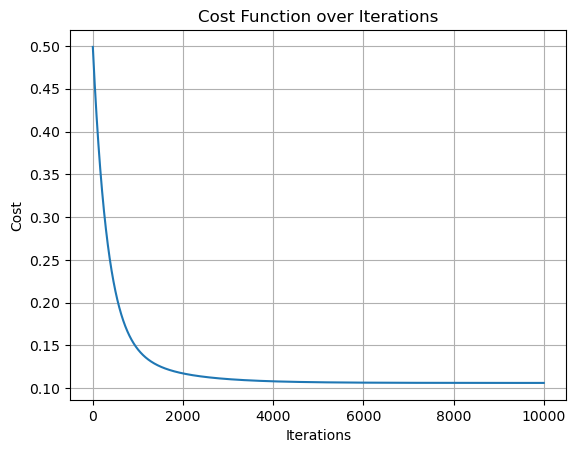

In [24]:
### Task 3 -d:  Plotting graph of Cost function and describe how it changes over iterations.

# Plot the cost function over iterations to visualize convergence
plt.plot(cost_history)  # Plotting the cost history
plt.title('Cost Function over Iterations')  # Title of the plot
plt.xlabel('Iterations')  # Label for the x-axis
plt.ylabel('Cost')  # Label for the y-axis
plt.grid()  # Add a grid for better readability
plt.show()  # Display the plot



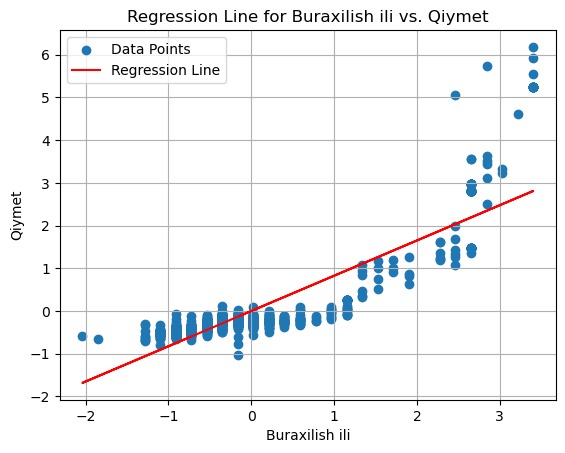

In [25]:
### Task 3 -e: Plotting points of Y (Qiymet) and X1 (Buraxilish ili) and draw a line of predictions made with parameters you got from gradient descent.

# Create a scatter plot of normalized 'Buraxilish ili' vs. normalized 'Qiymet'
plt.scatter(normalization_buraxilish_ili, normalization_qiymet, label='Data Points')  # Scatter plot of the data points
plt.xlabel("Buraxilish ili")  # Label for the x-axis
plt.ylabel("Qiymet")  # Label for the y-axis

# Calculate predictions based on the linear regression model
predictions1 = weights[0] + weights[1] * normalization_buraxilish_ili  # Linear equation for predictions

# Plot the regression line
plt.plot(normalization_buraxilish_ili, predictions1, color="red", label='Regression Line')  # Plotting the predictions as a line
plt.legend()  # Show legend to differentiate data points and regression line
plt.title("Regression Line for Buraxilish ili vs. Qiymet")  # Title for the plot
plt.grid()  # Add a grid for better readability
plt.show()  # Display the plot


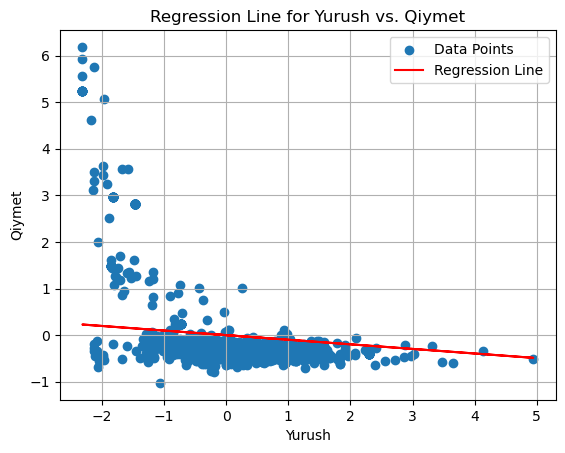

In [26]:
### Task 3 -f: Plotting points of Y (Qiymet) and X2 (Yurush) and draw a line of predictions made with parameters you got from gradient descent

# Create a scatter plot of normalized 'Yurush' vs. normalized 'Qiymet'
plt.scatter(normalization_yurush, normalization_qiymet, label='Data Points')  # Scatter plot of the data points
plt.xlabel("Yurush")  # Label for the x-axis
plt.ylabel("Qiymet")  # Label for the y-axis

# Calculate predictions based on the linear regression model
predictions2 = weights[0] + weights[2] * normalization_yurush  # Linear equation for predictions

# Plot the regression line
plt.plot(normalization_yurush, predictions2, color="red", label='Regression Line')  # Plotting the predictions as a line
plt.legend()  # Show legend to differentiate data points and regression line
plt.title("Regression Line for Yurush vs. Qiymet")  # Title for the plot
plt.grid()  # Add a grid for better readability
plt.show()  # Display the plot


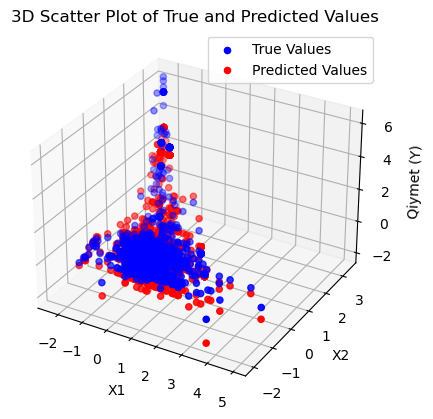

In [27]:
### Task 3 -g: Plotting 3D graph of points of Y (Qiymet), X1, X2 and predicted Y (Qiymet) using the same X1 and X2. It should look like this (blue points are true values, red points are predicted values):

# Sample Data
predicted_Y = weights[0] + weights[1]*normalization_buraxilish_ili + weights[2]*normalization_yurush

# Create 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot true values (Y)
ax.scatter(normalization_yurush,normalization_buraxilish_ili, normalization_qiymet, color='blue', label='True Values')

# Plot predicted values (predicted Y)
ax.scatter(normalization_yurush,normalization_buraxilish_ili, predicted_Y, color='red', label='Predicted Values')

# Labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Qiymet (Y)')
ax.set_title('3D Scatter Plot of True and Predicted Values')

# Legend
ax.legend()

# Show plot
plt.show()


In [28]:
### Task 3 - h : Predicting the prices of these cars by using your parameters and compare your predictions with the actual prices.

car1_yurush=240000
car1_buraxilish_ili=2000,
car1_qiymet=11500

car2_yurush=415558
car2_buraxilish_ili=1996
car2_qiymet=8800




In [29]:
normalization_car1_yurush=(car1_yurush-mean_yurush)/std_yurush
normalization_car1_buraxilish_ili=(car1_buraxilish_ili-mean_buraxilish_ili)/std_buraxilish_ili
normalization_car1_qiymet=((car1_qiymet-mean_qiymet)/std_qiymet)*std_qiymet+mean_qiymet

normalization_car2_yurush=(car2_yurush-mean_yurush)/std_yurush
normalization_car2_buraxilish_ili=(car2_buraxilish_ili-mean_buraxilish_ili)/std_buraxilish_ili
normalization_car2_qiymet=((car2_qiymet-mean_qiymet)/std_qiymet)*std_qiymet+mean_qiymet

In [30]:
prediction_car1=(weights[0]+weights[1]*normalization_car1_buraxilish_ili+weights[2]*normalization_car1_yurush)*std_qiymet+mean_qiymet
prediction_car2=(weights[0]+weights[1]*normalization_car2_buraxilish_ili+weights[2]*normalization_car2_yurush)*std_qiymet+mean_qiymet


In [31]:
print("Actual and predicted value: ",normalization_car1_qiymet,prediction_car1)
print("Actual and predicted value: ",normalization_car2_qiymet,prediction_car2)

Actual and predicted value:  11500.0 [15841.4388811]
Actual and predicted value:  8800.0 [5426.06556651]


# Task 4 -  Linear Regression using library


In [32]:
# Combine normalized features into a training dataset (x_train)
# 'normalization_buraxilish_ili' and 'normalization_yurush' are the normalized feature arrays
x_train = np.column_stack((normalization_buraxilish_ili, normalization_yurush)) 

# Assign normalized target values to the training labels (y_train)
# 'normalization_qiymet' is the normalized target array
y_train = normalization_qiymet


In [33]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the Linear Regression model to the training data
# 'x_train' contains the input features, and 'y_train' contains the target values
lr.fit(x_train, y_train)



LinearRegression()

In [34]:
# Print the performance score of the Linear Regression model on the training data
# The score represents the coefficient of determination (R²), indicating how well the model fits the data
print(lr.score(x_train, y_train), 
     # Print the coefficients of the linear model, which represent the weights assigned to each feature
      lr.coef_)


0.7875542502164051 [[ 0.83118047 -0.09337891]]


In [35]:
# Create a NumPy array for the 'buraxilish ili' feature from two cars
# 'normalization_car1_buraxilish_ili' and 'normalization_car2_buraxilish_ili' are the normalized values for each car
x_buraxilish_ili = np.array([normalization_car1_buraxilish_ili, normalization_car2_buraxilish_ili])

# Create a NumPy array for the 'yurush' feature from two cars
# 'normalization_car1_yurush' and 'normalization_car2_yurush' are the normalized values for each car
x_yurush = np.array([normalization_car1_yurush, normalization_car2_yurush])


C:\Users\Ehtiram\AppData\Local\Temp\ipykernel_8808\3508729515.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_buraxilish_ili = np.array([normalization_car1_buraxilish_ili, normalization_car2_buraxilish_ili])


In [36]:
x_test = np.column_stack((x_buraxilish_ili, x_yurush))

In [37]:
x_test

array([[array([0.02514965]), -0.32871870785208485],
       [-0.7253837861123692, 1.1267494610140756]], dtype=object)

In [38]:
normalization_car1_qiymet=((car1_qiymet-mean_qiymet)/std_qiymet)
normalization_car2_qiymet=((car2_qiymet-mean_qiymet)/std_qiymet)

In [39]:
y_test=np.array([normalization_car1_qiymet,normalization_car2_qiymet])

In [40]:
# Use the trained Linear Regression model to make predictions on the test dataset (x_test)
# 'x_test' contains the input features, and 'y_pred' will store the predicted target values
y_pred = lr.predict(x_test)


In [41]:
print(y_test,y_pred)

[-0.2650334  -0.46290404] [[ 0.0515993 ]
 [-0.70813947]]


In [42]:
# Calculate the Mean Squared Error (MSE) between the actual target values (y_test) and the predicted values (y_pred)
# MSE measures the average squared difference between the estimated values and the actual value
mse = mean_squared_error(y_test, y_pred)

# Output the calculated Mean Squared Error
print(mse)


0.08019834057789635


# Task 5 - Linear Regression using normal equation

In [43]:
# Add a column of ones to the training dataset (x_train) to account for the bias term in linear regression
# 'np.c_' is used to concatenate the column of ones with 'x_train'
x_n_equation = np.c_[np.ones((1328, 1)), x_train]

# Calculate the optimal parameters (theta) for the linear regression model using the Normal Equation
# 'inv' computes the inverse of the matrix product, and the formula calculates theta as:
# theta = (X^T * X)^(-1) * X^T * y
theta = inv(x_n_equation.T.dot(x_n_equation)).dot(x_n_equation.T).dot(y_train)


In [44]:
print(f"Weights with gradient descent:{weights}\n")
print(f"Weights with normal equation: {theta}")

Weights with gradient descent:[[ 1.67636937e-14]
 [ 8.26135369e-01]
 [-9.84238722e-02]]

Weights with normal equation: [[ 1.69586567e-14]
 [ 8.31180468e-01]
 [-9.33789127e-02]]


In [45]:
# Add a column of ones to the test dataset (x_test) to account for the bias term in linear regression
# 'np.c_' is used to concatenate the column of ones with 'x_test'
x_test_n_equation = np.c_[np.ones((2, 1)), x_test]

# Calculate the predicted target values (y_predict_n_equation) for the test dataset using the normal equation
# This multiplies the augmented test dataset by the calculated parameters (theta) to get predictions
y_predict_n_equation = x_test_n_equation.dot(theta)

# Output the predicted target values
print(y_predict_n_equation)


[[array([0.0515993])]
 [-0.7081394740504345]]


In [46]:
print(f"Predictions with using library:{y_pred}\n")
print(f"Predictions with normal equation: {y_predict_n_equation}")

Predictions with using library:[[ 0.0515993 ]
 [-0.70813947]]

Predictions with normal equation: [[array([0.0515993])]
 [-0.7081394740504345]]
